# **Analise 8**

Com essa analise foi possivel inferir qual a sazonalidade de vendas.

### **Importando Bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#### **Importando Tabelas** 

In [2]:
orders = pd.read_csv('./Files/Dataset_tratado/df_order_dataset.csv')
order_payments = pd.read_csv('./Files/Dataset_tratado/df_order_payments.csv')

### **Sazonalidade Trimestral**
* Basicamente, o código está analisando a sazonalidade das vendas ao longo do tempo, organizando os dados em trimestres e exibindo a quantidade de vendas em cada um deles.

In [3]:
# Converter a coluna 'order_purchase_timestamp' para o tipo de data
orders['order_purchase_timestamp_date'] = pd.to_datetime(orders['order_purchase_timestamp_date'])

# Extrair o trimestre a partir da coluna 'order_purchase_timestamp'
orders['order_trimester'] = orders['order_purchase_timestamp_date'].dt.to_period('Q')

# Agrupar as vendas por trimestre e calcular a média
trimester_sales = orders.groupby('order_trimester').size()

# Exibir a série temporal da sazonalidade das vendas
print(trimester_sales)

order_trimester
2016Q3        1
2016Q4      271
2017Q1     4935
2017Q2     8983
2017Q3    12214
2017Q4    17279
2018Q1    20628
2018Q2    19643
2018Q3    12507
Freq: Q-DEC, dtype: int64


### **Plotagem Grafico Trimestres**
* Este trecho de código realiza a plotagem de um gráfico de linha, representando a sazonalidade das vendas ao longo dos trimestres. O eixo x representa os trimestres, o eixo y mostra o número de vendas, e o gráfico é exibido com marcadores e linhas conectando os pontos. O objetivo é visualizar padrões ou tendências sazonais nas vendas trimestrais. O gráfico é configurado com um título, rótulos para os eixos x e y, e uma grade de fundo para facilitar a interpretação. O resultado final é exibido usando a biblioteca Matplotlib.

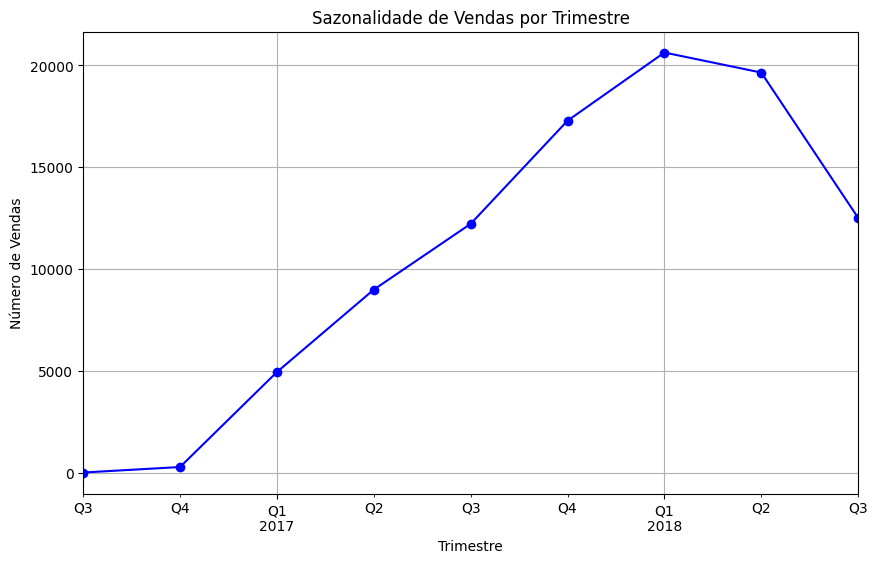

In [4]:
# Plotar o gráfico da série temporal da sazonalidade das vendas por trimestre
plt.figure(figsize=(10, 6))
trimester_sales.plot(kind='line', marker='o', color='blue')
plt.title('Sazonalidade de Vendas por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Número de Vendas')
plt.grid(True)
plt.show()

### **Sazonalidade Mensal**
* Neste trecho de código, os dados de vendas são agrupados por mês, extraindo o mês da coluna 'order_purchase_timestamp'. A média de vendas é então calculada para cada mês. O resultado é uma série temporal que mostra a sazonalidade das vendas ao longo dos meses. O código imprime essa série temporal, fornecendo uma visão geral das flutuações nas vendas mensais ao longo do tempo.

In [5]:
# Extrair o mês a partir da coluna 'order_purchase_timestamp'
orders['order_month'] = orders['order_purchase_timestamp_date'].dt.to_period('M')

# Agrupar as vendas por mês e calcular a média
monthly_sales = orders.groupby('order_month').size()

# Exibir a série temporal da sazonalidade das vendas
print(monthly_sales)

order_month
2016-09       1
2016-10     270
2016-12       1
2017-01     748
2017-02    1641
2017-03    2546
2017-04    2303
2017-05    3545
2017-06    3135
2017-07    3872
2017-08    4193
2017-09    4149
2017-10    4478
2017-11    7288
2017-12    5513
2018-01    7069
2018-02    6556
2018-03    7003
2018-04    6798
2018-05    6749
2018-06    6096
2018-07    6156
2018-08    6351
Freq: M, dtype: int64


### **Plotagem Grafico Mensal**
* Neste trecho, a sazonalidade das vendas é visualizada por meio de um gráfico de linha. O eixo x representa os meses, o eixo y mostra o número de vendas para cada mês. O gráfico é uma ferramenta visual que ajuda a identificar padrões e flutuações nas vendas ao longo dos diferentes meses. O código utiliza a biblioteca Matplotlib para criar e exibir o gráfico.

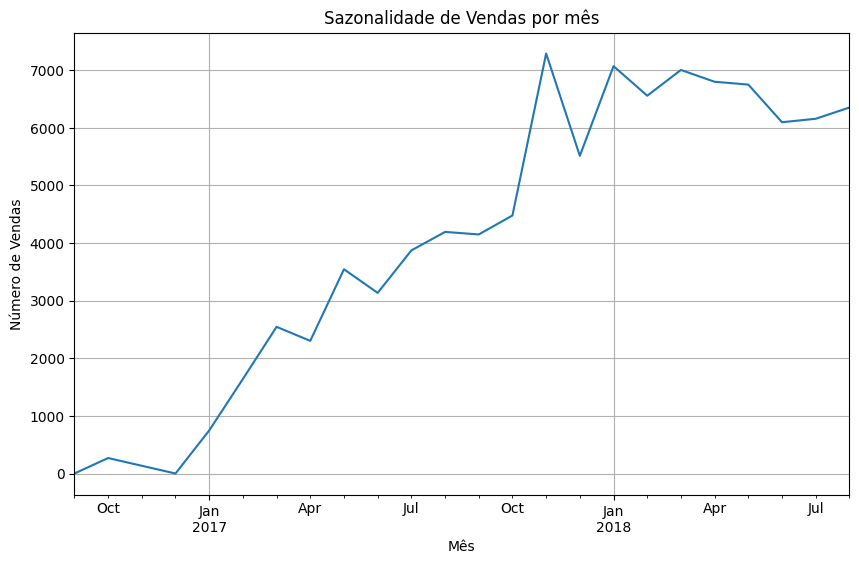

In [6]:
# Plotar a sazonalidade das vendas
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Sazonalidade de Vendas por mês')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.grid(True)
plt.show()

### **Merge**
* Mesclando os DataFrames "t_olist_orders_dataset.csv" e "t_olist_order_payments_dataset.csv" usando a coluna "order_id" como chave de mesclagem.

In [7]:
# Mesclar os DataFrames usando a coluna 'order_id' como chave de mesclagem
merged_df = pd.merge(orders, order_payments, on='order_id')

### **Sazonalidade Hora**
* Neste trecho, a sazonalidade das vendas é analisada em relação às horas do dia. A coluna 'order_purchase_timestamp_hour' é convertida para o formato datetime, e em seguida, a hora é extraída dessa coluna. O código conta o número de vendas para cada hora do dia e exibe essa série temporal. O resultado mostra como as vendas variam ao longo das diferentes horas, proporcionando insights sobre padrões de comportamento dos consumidores ao longo do tempo.

In [8]:
# Converter a coluna 'order_purchase_timestamp_hour' para datetime
merged_df['order_purchase_timestamp_hour'] = pd.to_datetime(merged_df['order_purchase_timestamp_hour'])

# Extrair a hora da coluna 'order_purchase_timestamp_hour'
merged_df['order_purchase_hour'] = merged_df['order_purchase_timestamp_hour'].dt.hour

# Contar as vendas por hora
hourly_sales = merged_df.groupby('order_purchase_hour').size()

# Exibir a série temporal da sazonalidade por hora
print(hourly_sales)

C:\Users\ton98\AppData\Local\Temp\ipykernel_6492\18645988.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['order_purchase_timestamp_hour'] = pd.to_datetime(merged_df['order_purchase_timestamp_hour'])


order_purchase_hour
0     2465
1     1177
2      518
3      267
4      212
5      189
6      489
7     1236
8     3019
9     4814
10    6226
11    6676
12    6091
13    6551
14    6656
15    6474
16    6763
17    6176
18    5857
19    6043
20    6298
21    6339
22    5984
23    4219
dtype: int64


### **Plotagem Grafico Hora**
* Neste trecho, é gerado um gráfico de linha para visualizar a sazonalidade das vendas ao longo das horas do dia. O gráfico é configurado para exibir as vendas por hora, utilizando marcadores azuis para destacar os pontos. O título, rótulos nos eixos e a grade ajudam na interpretação do gráfico, fornecendo uma representação visual da variação nas vendas ao longo das diferentes horas do dia. O tamanho da figura é ajustado para melhor visualização.

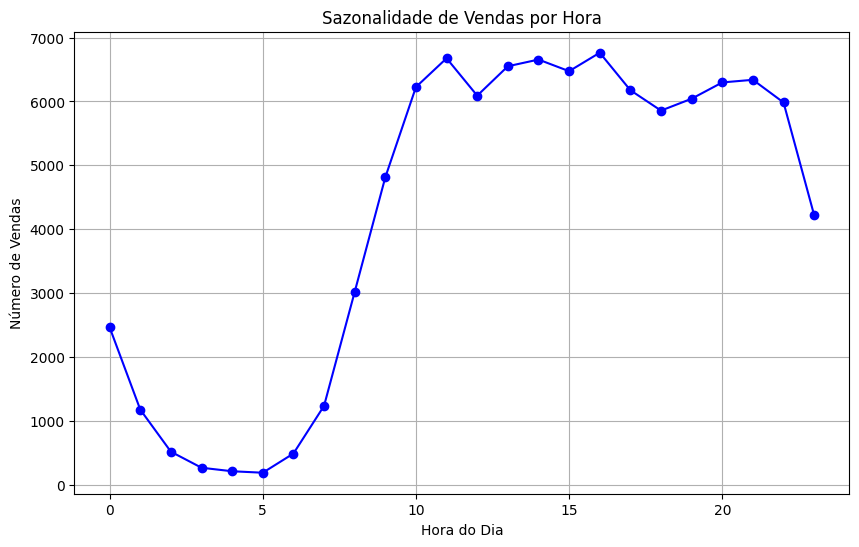

In [9]:
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Sazonalidade de Vendas por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Vendas')
plt.grid(True)
plt.show()

### **Sazonalidade de Vendas por Trimestre na Região Sudeste.**
* Este código carrega os dados, filtra clientes da região Sudeste e realiza a plotagem da sazonalidade de vendas por trimestre na região Sudeste.

C:\Users\ton98\AppData\Local\Temp\ipykernel_6492\1619698671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southeast_customers['order_purchase_timestamp_date'] = pd.to_datetime(southeast_customers['order_purchase_timestamp_date'])
C:\Users\ton98\AppData\Local\Temp\ipykernel_6492\1619698671.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southeast_customers['order_trimester'] = southeast_customers['order_purchase_timestamp_date'].dt.to_period('Q')


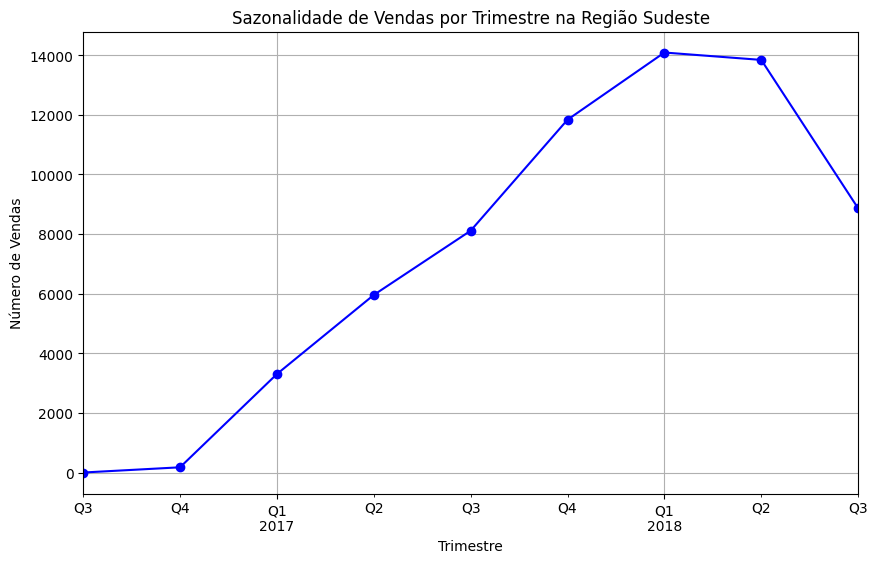

In [10]:
# Carregar os arquivos CSV para os DataFrames correspondentes
customers = pd.read_csv('./Files/Dataset_tratado/df_customers.csv')
orders = pd.read_csv('./Files/Dataset_tratado/df_order_dataset.csv')

# Unir os DataFrames usando a coluna 'customer_id' como chave de junção
merged_data = pd.merge(orders, customers, on='customer_id')

# Filtrar para incluir apenas clientes da região Sudeste (SP, RJ, MG, ES)
southeast_customers = merged_data[merged_data['customer_state'].isin(['SP', 'RJ', 'MG', 'ES'])]

# Converter a coluna 'order_purchase_timestamp' para o tipo de data
southeast_customers['order_purchase_timestamp_date'] = pd.to_datetime(southeast_customers['order_purchase_timestamp_date'])

# Extrair o trimestre a partir da coluna 'order_purchase_timestamp'
southeast_customers['order_trimester'] = southeast_customers['order_purchase_timestamp_date'].dt.to_period('Q')

# Agrupar as vendas por trimestre e calcular a média
trimester_sales = southeast_customers.groupby('order_trimester').size()

# Plotar o gráfico da série temporal da sazonalidade das vendas por trimestre
plt.figure(figsize=(10, 6))
trimester_sales.plot(kind='line', marker='o', color='blue')
plt.title('Sazonalidade de Vendas por Trimestre na Região Sudeste')
plt.xlabel('Trimestre')
plt.ylabel('Número de Vendas')
plt.grid(True)
plt.show()

### **Criação do DataFrame "c_compras_clientes.csv"**

In [11]:
# Carregar os DataFrames
df_olist_orders = pd.read_csv('./Files/Dataset_tratado/df_order_dataset.csv')
df_order_items = pd.read_csv('./Files/Dataset_tratado/df_order_itens.csv')

# Fundir os DataFrames usando a coluna 'product_id' como chave
df_merged = pd.merge(df_olist_orders, df_order_items[['order_id', 'product_id']], on='order_id', how='left')

# Salvar o novo DataFrame em um arquivo CSV
df_merged.to_csv('./Files/Arquivos Projeto/c_compras_clientes.csv', index=False)

* Este código carrega os DataFrames "customers_products.csv" e "olist_products_dataset.csv", adiciona os dados da coluna "product_id" do DataFrame "olist_products_dataset.csv" e, em seguida, salva o resultado em um novo arquivo chamado "customers_products_with_product_id.csv".

* Criação da "customers_products_with_product_id.csv" para realizar a junção com "c_compras_clientes.csv" e "olist_products_dataset.csv"

In [12]:
# Carregar o DataFrame 'customers_products.csv'
customers_products_df = pd.read_csv('./Files/Dataset_tratado/df_customers.csv')

# Carregar o DataFrame 'olist_products_dataset.csv' para obter os dados da coluna 'product_id'
products_df = pd.read_csv('./Files/Dataset_tratado/df_products_dataset.csv')

# Adicionar a coluna 'product_id' do 'products_df' ao 'customers_products_df'
customers_products_df['product_id'] = products_df['product_id']

# Salvar o resultado em um novo arquivo CSV
customers_products_df.to_csv('./Files/Arquivos Projeto/c_customers_products_with_product_id.csv', index=False)

Junção "c_compras_clientes.csv", "c_customers_products_with_product_id.csv" e "olist_products_dataset.csv".

In [13]:
# Carregar os DataFrames
compras_df = pd.read_csv('./Files/Arquivos Projeto/c_compras_clientes.csv')
customers_products_df = pd.read_csv('./Files/Arquivos Projeto/c_customers_products_with_product_id.csv')
products_df = pd.read_csv('./Files/Dataset_tratado/df_products_dataset.csv')

# Realizar a junção dos DataFrames usando a coluna 'product_id' como chave
merged_df = compras_df.merge(customers_products_df, on='product_id', how='inner')
merged_df = merged_df.merge(products_df, on='product_id', how='inner')

# Salvar o resultado em um novo arquivo CSV
merged_df.to_csv('./Files/Arquivos Projeto/customers_compras_products.csv', index=False)

Exibe as primeiras linhas do DataFrame "customers_compras_products.csv" em um formato de tabela estruturada.

In [14]:
# Carregar o DataFrame do arquivo 'customers_compras_products.csv'
merged_df = pd.read_csv('./Files/Arquivos Projeto/customers_compras_products.csv')

# Exibir as primeiras linhas do DataFrame em formato de tabela
print(merged_df.head().to_string(index=False))

                        order_id                    customer_id_x order_status order_purchase_timestamp_date order_purchase_timestamp_hour order_approved_at_date order_approved_at_hour order_delivered_carrier_date_date order_delivered_carrier_date_hour order_delivered_customer_date_date order_delivered_customer_date_hour order_estimated_delivery_date_date order_estimated_delivery_date_hour                       product_id                    customer_id_y               customer_unique_id  customer_zip_code_prefix  customer_city customer_state product_category_name  product_name_lenght  product_description_lenght  product_photos_qty  product_weight_g  product_length_cm  product_height_cm  product_width_cm
e481f51cbdc54678b7cc49136f2d6af7 9ef432eb6251297304e76186b10a928d    delivered                    2017-10-02                      10:56:33             2017-10-02               11:07:15                        2017-10-04                          19:55:00                         2017-10-10

Esse código filtra os dados para o último semestre do último ano.
Em seguida, agrupar os dados por região "customer_state" e "product_category_name", contando as vendas de cada categoria.
Seleciona as cem principais categorias de produtos vendidos em cada região do Brasil.

In [15]:
# Carregar o DataFrame 'customers_compras_products.csv'
df = pd.read_csv('./Files/Arquivos Projeto/customers_compras_products.csv')

# Converter a coluna 'order_purchase_timestamp_date' para o tipo datetime
df['order_purchase_timestamp_date'] = pd.to_datetime(df['order_purchase_timestamp_date'])

# Filtrar os dados para o último semestre do último ano
last_year = df['order_purchase_timestamp_date'].dt.year.max()
last_semester_start = df[(df['order_purchase_timestamp_date'].dt.year == last_year) & 
                         (df['order_purchase_timestamp_date'].dt.month > 6)]

# Agrupar por região ('customer_state') e 'product_category_name', contando as vendas
grouped = last_semester_start.groupby(['customer_state', 'product_category_name']).size().reset_index(name='count')

# Encontrar as cem principais categorias de produtos vendidos em cada região
top_categories = grouped.groupby('customer_state').apply(lambda x: x.nlargest(100, 'count')).reset_index(drop=True)

# Imprimir a saída
print(top_categories)

    customer_state           product_category_name  count
0               AC     fashion_bolsas_e_acessorios      1
1               AC  fashion_underwear_e_moda_praia      1
2               AC                     moveis_sala      1
3               AC              relogios_presentes      1
4               AL                      automotivo     29
..             ...                             ...    ...
743             TO                      cool_stuff      1
744             TO                   esporte_lazer      1
745             TO                 livros_tecnicos      1
746             TO                malas_acessorios      1
747             TO                moveis_decoracao      1

[748 rows x 3 columns]


As 10 principais categorias de produtos vendidas em cada estado do Brasil no último semestre do ano passado - 2017.

In [16]:
# Carregar o DataFrame 'customers_compras_products.csv'
df = pd.read_csv('./Files/Arquivos Projeto/customers_compras_products.csv')

# Converter a coluna 'order_purchase_timestamp_date' para o tipo datetime
df['order_purchase_timestamp_date'] = pd.to_datetime(df['order_purchase_timestamp_date'])

# Filtrar os dados para o último semestre do último ano
last_year = df['order_purchase_timestamp_date'].dt.year.max()
last_semester_start = df[(df['order_purchase_timestamp_date'].dt.year == last_year) & 
                         (df['order_purchase_timestamp_date'].dt.month > 6)]

# Agrupar por região ('customer_state') e 'product_category_name', contando as vendas
grouped = last_semester_start.groupby(['customer_state', 'product_category_name']).size().reset_index(name='count')

# Encontrar as cem principais categorias de produtos vendidos em cada região
top_categories = grouped.groupby('customer_state').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Mapeamento de cores para cada estado
color_map_states = {
    'AC': '#FF0000',  # Vermelho
    'AL': '#00FF00',  # Verde
    'AP': '#0000FF',  # Azul
    'AM': '#FFFF00',  # Amarelo
    'BA': '#FF00FF',  # Magenta
    'CE': '#000000',  # Preto
    'DF': '#800000',  # Marrom
    'ES': '#808000',  # Oliva
    'GO': '#008080',  # Azul turquesa
    'MA': '#800080',  # Roxo
    'MT': '#FF8500',  # Laranja
    'MS': '#FF69B4',  # Rosa
    'MG': '#B8860B',  # Dourado
    'PA': '#9ACD32',  # Amarelo-verde
    'PB': '#483D8B',  # Azul ardósia escuro
    'PR': '#2E8B57',  # Verde mar
    'PE': '#20B2AA',  # Azul turquesa claro
    'PI': '#5F9EA0',  # Azul cadete
    'RJ': '#9FFF80',  # Verde chartreuse
    'RN': '#D2691E',  # Marrom ferrugem
    'RS': '#6495ED',  # Azul ardósia
    'RO': '#DC143C',  # Vermelho escuro
    'RR': '#00FFFF',  # Ciano
    'SC': '#1E90FF',  # Azul real
    'SP': '#8A2BE2',  # Azul violeta
    'SE': '#7FFFD4',  # Turquesa
    'TO': '#FFD700'   # Dourado
}

# Atribuir cores aos estados
top_categories['color'] = top_categories['customer_state'].map(color_map_states)

# Criar o gráfico de barras com cores específicas para cada estado
fig = px.bar(top_categories, x='count', y='product_category_name', color='customer_state', 
             title='As 10 principais categorias de produtos vendidas em cada estado do Brasil último semestre do ano passado - 2017',
             labels={'count': 'Count of Sales', 'product_category_name': 'Product Category'},
             color_discrete_map=color_map_states)  # Usar o mapeamento de cores

fig.update_layout(xaxis_title='Count of Sales', yaxis_title='Product Category')

# Mostrar o gráfico de barras
fig.show()

As 10 principais categorias de produtos vendidas em cada estado do Nordeste no último semestre do ano passado - 2017.

In [17]:
# Lista de estados da região Nordeste
northeastern_states = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']

# Filtrar os dados apenas para os estados do Nordeste
northeast_df = df[df['customer_state'].isin(northeastern_states)]

# Converter a coluna 'order_purchase_timestamp_date' para o tipo datetime
northeast_df['order_purchase_timestamp_date'] = pd.to_datetime(northeast_df['order_purchase_timestamp_date'])

# Filtrar os dados para o último semestre do último ano
last_year = northeast_df['order_purchase_timestamp_date'].dt.year.max()
last_semester_start = northeast_df[(northeast_df['order_purchase_timestamp_date'].dt.year == last_year) & 
                                   (northeast_df['order_purchase_timestamp_date'].dt.month > 6)]

# Agrupar por região ('customer_state') e 'product_category_name', contando as vendas
grouped = last_semester_start.groupby(['customer_state', 'product_category_name']).size().reset_index(name='count')

# Encontrar as dez principais categorias de produtos vendidos em cada estado do Nordeste
top_categories = grouped.groupby('customer_state').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Mapeamento de cores para cada estado
color_map_states = {
    'MA': '#800080',  # Roxo
    'PI': '#5F9EA0',  # Azul cadete
    'CE': '#000000',  # Preto
    'RN': '#D2691E',  # Marrom ferrugem
    'PB': '#483D8B',  # Azul ardósia escuro
    'PE': '#20B2AA',  # Azul turquesa claro
    'AL': '#00FF00',  # Verde
    'SE': '#7FFFD4',  # Turquesa
    'BA': '#FF00FF'   # Magenta
}

# Atribuir cores aos estados
top_categories['color'] = top_categories['customer_state'].map(color_map_states)

# Criar o gráfico de barras com cores específicas para cada estado do Nordeste
fig = px.bar(top_categories, x='count', y='product_category_name', color='customer_state', 
             title='As 10 principais categorias de produtos vendidas em cada estado do Nordeste no último semestre do ano passado - 2017',
             labels={'count': 'Count of Sales', 'product_category_name': 'Product Category'},
             color_discrete_map=color_map_states)  # Usar o mapeamento de cores

fig.update_layout(xaxis_title='Count of Sales', yaxis_title='Product Category')

# Mostrar o gráfico de barras
fig.show()

C:\Users\ton98\AppData\Local\Temp\ipykernel_6492\1201351188.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



As 10 principais categorias de produtos vendidas na região do Nordeste no último semestre do ano passado - 2017

In [18]:
# Lista de estados da região Nordeste
northeastern_states = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']

# Filtrar os dados apenas para os estados do Nordeste
northeast_df = df[df['customer_state'].isin(northeastern_states)]

# Converter a coluna 'order_purchase_timestamp_date' para o tipo datetime
northeast_df['order_purchase_timestamp_date'] = pd.to_datetime(northeast_df['order_purchase_timestamp_date'])

# Filtrar os dados para o último semestre do ano de 2017
last_semester_start = northeast_df[
    (northeast_df['order_purchase_timestamp_date'].dt.year == 2017) &
    (northeast_df['order_purchase_timestamp_date'].dt.month > 6)
]

# Agrupar por 'product_category_name', contando as vendas
grouped = last_semester_start.groupby('product_category_name').size().reset_index(name='count')

# Encontrar as dez principais categorias de produtos vendidos no Nordeste
top_categories = grouped.nlargest(10, 'count')

# Mapeamento de cores para cada estado do Nordeste
color_map_states = {
    'MA': '#800080',  # Roxo
    'PI': '#5F9EA0',  # Azul cadete
    'CE': '#000000',  # Preto
    'RN': '#D2691E',  # Marrom ferrugem
    'PB': '#483D8B',  # Azul ardósia escuro
    'PE': '#20B2AA',  # Azul turquesa claro
    'AL': '#00FF00',  # Verde
    'SE': '#7FFFD4',  # Turquesa
    'BA': '#FF00FF'   # Magenta
}

# Criar o gráfico de barras com cores específicas para cada estado do Nordeste
fig = px.bar(top_categories, x='count', y='product_category_name',
             title='As 10 principais categorias de produtos vendidas na região do Nordeste no último semestre do ano passado - 2017',
             labels={'count': 'Contagem de Vendas', 'product_category_name': 'Categoria de Produto'},
             color='product_category_name', color_discrete_map=color_map_states)  # Usar o mapeamento de cores

fig.update_layout(xaxis_title='Contagem de Vendas', yaxis_title='Categoria de Produto')

# Mostrar o gráfico de barras
fig.show()

C:\Users\ton98\AppData\Local\Temp\ipykernel_6492\764446626.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



As 10 principais categorias de produtos vendidas na região do Nordeste nos dias 20, 21, 22, 23, 24 e 25 de dezembro de 2017.

In [19]:
# Lista de estados da região Nordeste
northeastern_states = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']

# Filtrar os dados apenas para os estados do Nordeste
northeast_df = df[df['customer_state'].isin(northeastern_states)]

# Converter a coluna 'order_purchase_timestamp_date' para o tipo datetime
northeast_df['order_purchase_timestamp_date'] = pd.to_datetime(northeast_df['order_purchase_timestamp_date'])

# Filtrar os dados para os dias específicos
specific_dates = ['2017-12-20', '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25']
filtered_dates = northeast_df[northeast_df['order_purchase_timestamp_date'].isin(specific_dates)]

# Agrupar por 'product_category_name', contando as vendas
grouped = filtered_dates.groupby('product_category_name').size().reset_index(name='count')

# Mostrar as categorias de produtos e suas contagens
print(grouped)

                             product_category_name  count
0                                       automotivo      2
1                                            bebes      3
2                                     beleza_saude      2
3                                       brinquedos      5
4                                  cama_mesa_banho      4
5                construcao_ferramentas_construcao      1
6                                      eletronicos      7
7                                    esporte_lazer      3
8                      fashion_bolsas_e_acessorios      1
9                           informatica_acessorios      1
10                           instrumentos_musicais      1
11                          livros_interesse_geral      1
12  moveis_cozinha_area_de_servico_jantar_e_jardim      1
13                                moveis_decoracao      3
14                                       papelaria      3
15                                             pcs      2
16            

C:\Users\ton98\AppData\Local\Temp\ipykernel_6492\806620468.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



As 10 principais categorias de produtos vendidas na região do Nordeste nos dias 20, 21, 22, 23, 24 e 25 de dezembro de 2017.

In [20]:
# Lista de estados da região Nordeste
northeastern_states = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']

# Filtrar os dados apenas para os estados do Nordeste
northeast_df = df[df['customer_state'].isin(northeastern_states)]

# Converter a coluna 'order_purchase_timestamp_date' para o tipo datetime
northeast_df['order_purchase_timestamp_date'] = pd.to_datetime(northeast_df['order_purchase_timestamp_date'])

# Filtrar os dados para os dias específicos
specific_dates = ['2017-12-20', '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25']
filtered_dates = northeast_df[northeast_df['order_purchase_timestamp_date'].isin(specific_dates)]

# Agrupar por 'product_category_name', contando as vendas
grouped = filtered_dates.groupby('product_category_name').size().reset_index(name='count')

# Encontrar as dez principais categorias de produtos vendidos no Nordeste
top_categories = grouped.nlargest(10, 'count')

# Mapeamento de cores para cada estado do Nordeste
color_map_states = {
    'MA': '#800080',  # Roxo
    'PI': '#5F9EA0',  # Azul cadete
    'CE': '#000000',  # Preto
    'RN': '#D2691E',  # Marrom ferrugem
    'PB': '#483D8B',  # Azul ardósia escuro
    'PE': '#20B2AA',  # Azul turquesa claro
    'AL': '#00FF00',  # Verde
    'SE': '#7FFFD4',  # Turquesa
    'BA': '#FF00FF'   # Magenta
}

# Criar o gráfico de barras com cores específicas para cada estado do Nordeste
fig = px.bar(top_categories, x='count', y='product_category_name',
             title='As 10 principais categorias de produtos vendidas na região do Nordeste nos dias 20, 21, 22, 23, 24 e 25 de dezembro de 2017',
             labels={'count': 'Contagem de Vendas', 'product_category_name': 'Categoria de Produto'},
             color='product_category_name', color_discrete_map=color_map_states)  # Usar o mapeamento de cores

fig.update_layout(xaxis_title='Contagem de Vendas', yaxis_title='Categoria de Produto')

# Mostrar o gráfico de barras
fig.show()

C:\Users\ton98\AppData\Local\Temp\ipykernel_6492\3246045198.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

